# 朴素贝叶斯

## 根据概率进行分类

使用机器学习算法进行预测分类，通常我们得到的结果是：“样本属于类型1或类型2”。

![2分类问题](images/bayes/两个类型2.jpg)

这个结论有点生硬，而且还不总是正确的。

人们希望分类器不仅给出预测分类的结果，同时给出预测正确的概率估计值，这样更容易让人接受。

或者在预测时，计算出样本属于各个类别的概率，这样我们可以比较概率值，属于哪个类别的概率值大，就判定该样本属于哪个类。

假如，我们用P1(x)来表示数据样本x属于类别1的概率，用P2(x)来表示数据样本x属于类别2的概率.

对于一个新的数据样本$x^{'}$，可以用下面的规则来判断它的类别：

- 如果$P1(x^{'}) > P2(x^{'})$ ,那么类别为1；
- 如果$P1(x^{'}) < P2(x^{'})$ ,那么类别为2；

也就是说，我们会选择高概率对应的类别。

**这一思想是利用概率进行分类的思想，也是贝叶斯决策论的核心思想。**


## 概率计算基础

### 条件概率

条件概率（又称后验概率）就是事件B在另外一个事件A已经发生条件下的发生概率。

$P(B|A) = \frac{P(AB)}{P(A)}，其中P(A) \neq 0$

性质：$P(\bullet |A)$是概率，

- 非负性：$P(B|A) \geq 0$
- 规范性：$P(S|A) = 1$
- 可列可加性：$B_1,B_2,...,B_iBj = \emptyset ,i \neq j$

则 $P(\bigcup_{i=1}^\infty B_i|A) = \sum_{i=1}^\infty P(B_i|A)$

举例：一对夫妇有两个孩子，至少有一个是女孩儿，那么家里有2个女孩儿的概率是多少？（假定生男生女概率相同）。

解：根据题意，样本空间为 $S = {(兄，弟),(兄，妹),(姐，弟),(姐，妹)}$

已经知道的事件 $A = {(兄，妹),(姐，弟),(姐，妹)}$

欲求概率的事件 $B = {(姐，妹)}$

$P(B|A) = \frac{1}{3}$

### 全概率公式

全概率公式为概率论中的重要公式，它将对一复杂事件A的概率求解问题转化为了在不同情况下发生的简单事件的概率的求和问题。

定义：称$B_1,B_2,...，B_n$ 为S的一个划分，若（1）不漏，即$B_1\bigcup B_2 \bigcup ...\bigcup B_n = S$；（2）不重，$B_1B_2 = \emptyset，i \neq j$.

定理：设$B_1,B_2,...，B_n$ 为S的一个划分，且$P(B_i) > 0$. 则有全概率公式：$P(A) = \sum_{j=1}^n P(B_j)P(A|B_j)$。

注：运用全概率公式，关键是构造合适的划分。

### 贝叶斯公式

定理：设$B_1,B_2,...，B_n$ 为S的一个划分，且$P(B_i) > 0$。对$P(A) > 0 $有Bayes公式：

$P(B_i|A) = \frac{P(B_i)P(A|B_i)}{\sum_{j=1}^n P(B_j)P(A|B_j)} = \frac{p_iq_i}{\sum_{j=1}^n p_jq_j}$

贝叶斯公式的分子是条件概率；分母是全概率。但它所表达的意义却非常刻！ 

在全概率公式中，如果将A看成是“结果”，$B_i$看成是导致结果发生的诸多“原因”之一，那么**全概率公式就是一个“原因推结果”的过程**。

但贝叶斯公式却恰恰相反，**贝叶斯公式是“由结果归因溯源的过程”**。

贝叶斯公式中，我们是知道结果A已经发生了，所要做的是反过来研究造成结果发生的原因，即“结果推原因”。

## 贝叶斯决策论

贝叶斯决策论（Bayesian decision theory）是概率框架下实施决策的基本方法。
 
对分类任务来说，**在所有相关概率都已知的理想情形下，贝叶斯决策论考虑如何基于这些概率和误判损失来选择最优的类别标记。**

下面以多分类任务为例，解释其基本原理。

假设有N种可能的类别标记，即$y = \{c_1,c_2,...,c_N\}$, 

> 例如：前面讲过的西瓜分类中，$y = \{ c_1 = 好瓜,c_2 = 坏瓜\}$

$\lambda_{ij}$ 是将一个真实标记为$c_j$的样本误分类为$c_i$所产生的损失。损失值可以根据经验或实际问题进行确定。

> 例如：$\lambda_{12}$就是将一个本身是$c_2 = 坏瓜$的样本误分类为$c_1 = 好瓜$时产生的损失。

基于后验概率$P(c_i|x)$（即样本x被误判为$c_i$类型标记的概率）可获得将样本x分类为$c_i$所产生的期望损失（expected loss），即在样本x上的“条件风险”（conditional risk）

> $R(c_i|x) = \sum_{j=1}^N \lambda_{ij}P(c_j|x)$  ——式（1）

注：决策论中将“期望损失”称为“风险”（risk）

我们的任务是寻找一个判定准则$h：x \to y$ 以最小化总体风险：

> $R(h) = E_x[R(h(x)|x)]$  ——式（2）

注：可以把h当作某种函数，自变量是属性向量 x，值为y。找到这个函数 h，使“平均损失最小”。

显然，对每个样本x，若h能最小化条件风险R(h(x)|x)，则总体风险R(h)也将被最小化。

**这就产生了贝叶斯判定准则（Bayese Decision Rule）：为最小化总体风险，只需在每个样本上选择那个能使条件风险R(c|x)最小的类别标记**，即：

> $h^*(x) = argmin_{c \in y}R(c|x)$ ——式（3）

**此时, $h^*$称为贝叶斯最优分类器（Bayes optimal classifier）**，与之对应的**总体风险$R(h^*)$称为贝叶斯风险（Bayes risk）。**

$1 - R(h^*)$反映了分类器所能达到的最好性能，即通过机器学习所能产生的模型精度的理论上限。

具体说来，若目标是最小化分类错误率，则误判损失$\lambda_{ij}$可写为
$$ \lambda_{ij} = \left\{
\begin{aligned}
0,  i = j; \\
1, i \neq j.\\
\end{aligned}
\right.  ——式（4）
$$

此时条件风险为：$R(c|x) = 1 - P(c|x)$ ——式（5）

于是，最小分类错误率的贝叶斯最优分类器为：

> $h^*(x) = argmax_{c \in y}P(c|x)$ ——式（6）

即对每个样本x，选择能使后验概率$P(c|x)$最大的类别标签。

上面的分析，是通过概率论知识来构建机器学习中的分类器，由于计算$𝑃(𝑐|𝑥)$需要用到贝叶斯公式，所以称为贝叶斯决策论。

![贝叶斯分类器](images/bayes/bayesclassifier.png)

注意：有的机器学习算法不需要计算概率也能进行分类，那些分类器比较适合那些相关概率不容易得到，以至于不能推算$P(c|x)$的情况。

### 描述我们的问题

对于分类问题，给定训练样本集$D = {(x_1,y_1),(x_2,y_2),...(x_m,y_m)}$。假设标记y有N种可能的类别标记，即$y = \{c_1,c_2,...,c_N\}$。

$P(c_i|x_i)$指样本$x_i$属于$y_i$标记类别的概率。

如何求出这个概率值$P(c_i|x_i)$呢？

**事实上，这个概率有时候很难求出。对于机器学习来说，就是要根据有限的数据集，尽可能准确的估计所有的$P(c_i|x_i)$。**

例如对于下面的西瓜数据集，就是要根据这有限的17条数据计算$P(好瓜|x_i)$和$P(坏瓜|x_i)$

In [2]:
import pandas as pd

df = pd.read_csv("data/maloon/maloon3.txt",header=0) 
df

,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,标记
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,好瓜
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,好瓜
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,好瓜
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,好瓜
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,好瓜
5,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,好瓜
6,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,好瓜
7,8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,好瓜
8,9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,坏瓜
9,10,青绿,硬挺,清脆,清晰,平坦,软粘,0.243,0.267,坏瓜


大体来说，为计算$P(c_i|x_i)$，主要有两种策略：

- 判别式策略（discrimination models）

  + 给定x，可通过直接建模P(c|x)来预测c。

  + 注：决策树、BP神经网络、支持向量机等都是判别式模型。

- 生成式（generative models）

  + 先对联合概率分布$P(x,c)$建模，然后再由此获得$P(c|x)$。


生成式模型，要考虑计算$P(c|x)$，根据条件概率公式：

$P(c|x) = \frac{P(x,c)}{P(x)}$。 ——式（7）

根据贝叶斯定理：

$P(c|x) = \frac{P(x|c)P(c)}{P(x)}$。  ——式（8）

其中：

- P(c)是类“先验”概率（即有几种类型、各类型的概率已知，例如老农对瓜田里“好瓜”和“坏瓜”的概率是“心里有数的”）。

- $P(x|c)$是样本x相对于类标记c的类条件概率，或称为似然（likelihood）。例如，类型为“好瓜”的拍声为“闷响”的概率为80%。

- $P(x)$是用于归一化的“证据”因子（evidence）。对于给定样本x，证据因子$P(x)$与类标记无关。

因此，估计$P(x|c)$的问题就转化为“如何基于训练数据D来估计先验概率P(c)和条件概率$P(x|c)$”。

类先验概率$P(c)$,表达了样本空间中，各类样本所占的比例。根据大数定理，当训练集包含充足的独立同分布样本时，$P(c)$可通过各类样本出现的频率来进行估计。

对类条件概率$P(x|c)$，由于它涉及关于x所有属性的联合概率，直接根据样本出现的频率来估计会遇到严重困难。

例如，假设样本的d个属性都是二值的，则样本空间将有$2^d$种可能的取值，在现实应用中，这个值往往远大于训练样本数m，也就是说很多样本取值在训练集种根本没有出现，直接使用频率来估计$P(x|c)$显然不行。**因为“未被观测到”与“出现概率为0”通常是不同的**。

如上溯西瓜数据集有17条样本数据，但属性个数为8个，即便它们都是二值属性，样本空间的取值将为$2^8 = 256$种，但事实上远不止如此。那么瓜的类型（好瓜或坏瓜）已知时，各属性的联合概率不能通过统计频率来计算。



## 朴素贝叶斯分类器（Naive Bayes classifier）

根据上面的分析，要算$P(c|x) = \frac{P(x|c)P(c)}{P(x)}$。，就需要算$P(x|c)$，而样本量不够，使得以频率计算联合概率变得不可能（困难）。

为了避开这个困难，朴素贝叶斯分类器采用了**“属性条件独立性假设”：**

对已知类别，假设所有属性相互独立（so naive!）。

换言之，假设每个属性独立地对分类结果发生影响。

$P(c|x) = P(c|x_1,x_2,...,x_d) = \frac{P(y)P(x_1,...,x_d|c)}{P(x_1,...x_d)}$

有了Naive假设，则：

$P(x_1,...,x_d|c) = \prod_{i=1}^{d}P(x_i|c)$


$P(c|x) = \frac{P(x|c)P(c)}{P(x)} = \frac{P(c)}{P(x)}\prod_{i=1}^{d}P(x_i|c)$   ——式（14）

其中，d为属性数目，$x_i$为x在第i个属性上的取值。

由于对于所有类别来说，P(x)相同，因此基于式（6）的贝叶斯判定准则有：

> $h^*(x) = argmax_{c \in y}P(c|x) = argmax_{c \in y}\frac{P(c)}{P(x)}\prod_{i=1}^{d}P(x_i|c)$  ——式（15）

这就是朴素贝叶斯分类器的表达式。

显然，朴素贝叶斯分类器的训练过程，就是基于训练集D来估计类先验概率P(c),并为每个属性估计条件概率$P(x_i|c)$。

令$D_c$表示训练集D中第c类样本组合的集合，若有充足的独立同分布样本，则可容易地估计出类先验概率：

$P(c) = \frac{|D_c|}{|D|}$ ——式（16）

对离散属性而言，令$D_{c,x_i}$表示$D_c$中在第i个属性上取值为$x_i$的样本组成的集合，则条件概率$P(x_i|c)$可估计为：

$P(x_i|c) = \frac{|D_{c,x_i}|}{|D_c|}$ ——式（17）

对连续属性，可考虑概率密度函数，假定$P(x_i|c) \sim N(\mu_{c,i},\delta_{c,i}^{2})$,其中$\mu_{c,i}$和$\delta_{c,i}^{2}$，分别是第c类样本在第i个属性上取值的均值和方差，则有：

$p(x_i|c) = \frac{1}{\sqrt{2 \pi \delta_{c,i}}}exp(- \frac{(x_i - \mu_{c,i })^2}{2 \delta_{c,i }^2})$ ——式（18）

下面我们根据上面的西瓜数据，来尝试构造朴素贝叶斯分类器：

### 计算P(c)

In [2]:
import pandas as pd

df = pd.read_csv("data/maloon/maloon3.txt",header=0) 
print("计算P(C): ")
p_c_good = df[df['标记'] == '好瓜'].shape[0] /df.shape[0]
print("P(c=好瓜)={:.2}".format(p_c_good))
p_c_bad = df[df['标记'] == '坏瓜'].shape[0] /df.shape[0]
print("P(c=坏瓜)={:.2}".format(p_c_bad))

计算P(C): 
P(c=好瓜)=0.47
P(c=坏瓜)=0.53


### 计算每个属性对应的条件概率$P(x_i|c)$ 


In [3]:
#计算每个属性对应的条件概率 𝑃(𝑥𝑖|𝑐)
import pandas as pd
import math

df = pd.read_csv("data/maloon/maloon3.txt",header=0) 
"""
print("计算P(xi|c): ")
p = df[(df['色泽'] == '青绿') & (df['标记'] == '好瓜')].shape[0]/df[df['标记'] == '好瓜'].shape[0]
print("P(色泽=青绿|标记=好瓜)={}".format(p))

p = df[(df['色泽'] == '青绿') & (df['标记'] == '坏瓜')].shape[0]/df[df['标记'] == '坏瓜'].shape[0]
print("P(色泽=青绿|标记=坏瓜)={}".format(p))
"""
for col in df.columns[1:-3]:
    dt  = {}
    dt.update(df[col].value_counts())
    for key,value in dt.items():
        p = df[(df[col] == key) & (df['标记'] == '好瓜')].shape[0]/df[df['标记'] == '好瓜'].shape[0]
        print("P({}={}|标记=好瓜)={:.2}".format(col,key,p))
        p = df[(df[col] == key) & (df['标记'] == '坏瓜')].shape[0]/df[df['标记'] == '坏瓜'].shape[0]
        print("P({}={}|标记=坏瓜)={:.2}".format(col,key,p))
        print("---"*10)

p_dict = {}
p_dict["标记=好瓜"] = p_c_good
p_dict["标记=好瓜"] = p_c_bad

for col in df.columns[-3:-1]:
    mean_g =   df[df['标记'] == '好瓜'][col].mean()
    print("好瓜的{}均值为{:.3}".format(col,mean_g))
    mean_b = df[df['标记'] == '坏瓜'][col].mean()
    print("坏瓜的{}均值为{:.3}".format(col,mean_b))
    std_g = df[df['标记'] == '好瓜'][col].std()
    print("好瓜的{}标准差为{:.3}".format(col,std_g))
    std_b = df[df['标记'] == '坏瓜'][col].std()
    print("坏瓜的{}标准差为{:.3}".format(col,std_b))
    print("----"*10)
    dt  = {}
    dt.update(df[col].value_counts())
    for key in dt.keys():

        p = 1/(math.sqrt(2*math.pi) * std_g) *math.exp(- (key-mean_g)**2 / (2*std_g*std_g))
        p_dict["{}={}|标记=好瓜".format(col,key)] = p
        print("P({}={}|标记=好瓜)={:.3}".format(col,key,p))

        p = 1/(math.sqrt(2*math.pi) * std_b) *math.exp(- (key-mean_b)**2 / (2*std_b*std_b))
        p_dict["{}={}|标记=坏瓜".format(col,key)] = p
        print("P({}={}|标记=坏瓜)={:.3}".format(col,key,p))

print(p_dict)

计算P(xi|c): 
P(色泽=青绿|标记=好瓜)=0.375
P(色泽=青绿|标记=坏瓜)=0.3333333333333333
P(色泽=青绿|标记=好瓜)=0.38
P(色泽=青绿|标记=坏瓜)=0.33
------------------------------
P(色泽=乌黑|标记=好瓜)=0.5
P(色泽=乌黑|标记=坏瓜)=0.22
------------------------------
P(色泽=浅白|标记=好瓜)=0.12
P(色泽=浅白|标记=坏瓜)=0.44
------------------------------
P(根蒂=蜷缩|标记=好瓜)=0.62
P(根蒂=蜷缩|标记=坏瓜)=0.33
------------------------------
P(根蒂=稍蜷|标记=好瓜)=0.38
P(根蒂=稍蜷|标记=坏瓜)=0.44
------------------------------
P(根蒂=硬挺|标记=好瓜)=0.0
P(根蒂=硬挺|标记=坏瓜)=0.22
------------------------------
P(敲声=浊响|标记=好瓜)=0.75
P(敲声=浊响|标记=坏瓜)=0.44
------------------------------
P(敲声=沉闷|标记=好瓜)=0.25
P(敲声=沉闷|标记=坏瓜)=0.33
------------------------------
P(敲声=清脆|标记=好瓜)=0.0
P(敲声=清脆|标记=坏瓜)=0.22
------------------------------
P(纹理=清晰|标记=好瓜)=0.88
P(纹理=清晰|标记=坏瓜)=0.22
------------------------------
P(纹理=稍糊|标记=好瓜)=0.12
P(纹理=稍糊|标记=坏瓜)=0.44
------------------------------
P(纹理=模糊|标记=好瓜)=0.0
P(纹理=模糊|标记=坏瓜)=0.33
------------------------------
P(脐部=凹陷|标记=好瓜)=0.62
P(脐部=凹陷|标记=坏瓜)=0.22
------------------------------
P(脐部=稍凹|标记=好瓜)

### 预测

有新数据样本：

|编号|色泽|根蒂|敲声|纹理|脐部|触感|密度|含糖率|标记|
|-|-|-|-|-|-|-|-|-|-|
|1|青绿|蜷缩|浊响|清晰|凹陷|硬滑|0.697|0.460||

根据上面的计算，有：

$$ P(c=好瓜) * P(青绿|好瓜) * P(蜷缩|好瓜) * P(浊响|好瓜) * P(清晰|好瓜) * P(凹陷|好瓜) * P(硬滑|好瓜) * P(密度=0.697|好瓜) * P(含糖=0.460|好瓜)$$ = 0.038

$$ P(c=坏瓜) * P(青绿|坏瓜) * P(蜷缩|坏瓜) * P(浊响|坏瓜) * P(清晰|坏瓜) * P(凹陷|坏瓜) * P(硬滑|坏瓜) * P(密度=0.697|坏瓜) * P(含糖=0.460|坏瓜)$$ = 0.000068

由于0.038 > 0.000068，所以，朴素贝叶斯分类器将测试样本判定为“好瓜”

## 应用sklearn中的朴素贝叶斯分类器

朴素贝叶斯分类器虽然简单，但它却在很多实际预测中运行良好，而且它的效率很高，经常被应用在文本分类中，包括互联网新闻的分类，垃圾邮件的筛选。

朴素贝叶斯方法不大适于作回归任务，对于它给出的概率值不能过于相信。

在sklearn库种，实现了三个朴素贝叶斯分类器，如下表所示：

|分类器|描述|
|-|-|
| naive_bayes.GaussianNB|高斯朴素贝叶斯分类器|
|naive_bayes.BernoulliNB|贝努力朴素贝叶斯分类器|
|naive_bayes.MultinomialNB|多项式贝叶斯分类器|

它们的区别在于假设某一特征的所有属于某个类别的观测值符合特定分布，如：

- 高斯模型

适用于样本中每个属性的值是连续的，且服从高斯分布时，进行分类。

例如：人的身高一般符合高斯分布，涉及这种数据的分类问题就适合使用高斯朴素贝叶斯。

- 多项式模型(multinomial model)

如果属性值大部分是多元离散值，则采用多项式模型进行分类预测要好些。

- 伯努利模(Bernoulli model)

如果属性值多为二元离散值或是稀疏的多元离散值，则采用伯努利模型进行贝叶斯分类，准确率较高。

### 高斯朴素贝叶斯

#### 正态分布/高斯分布

正态分布（Normal distribution），也称“常态分布”，又名高斯分布（Gaussian distribution），最早由A.棣莫弗在求二项分布的渐近公式中得到。C.F.高斯在研究测量误差时从另一个角度导出了它。P.S.拉普拉斯和高斯研究了它的性质。是一个在数学、物理及工程等领域都非常重要的概率分布，在统计学的许多方面有着重大的影响力。

自然界和人类社会中，很多现象可以看作正态分布，例如：

- 人的身高、体重（或其他生理尺寸）
- 医学检查指标（血小板数、红细胞数）
- 测量误差


![正态分布](images/bayes/正态分布.jpg)

正态分布的定义：

若X的概率密度函数为：

$f(x) = \frac{1}{\sqrt{2 \pi} \delta}e^{-\frac{(x-\mu)^2}{2\delta^2}},-\infty < x < +\infty$

其中，$-\infty < \mu < \infty, \mu > 0 $，就称X服从参数为$\mu,\delta$的正态分布（或高斯分布）。

记为$X \sim N(\mu,\delta^2)$

特征：
- f(x)关于$ x = \mu$对称
- 当$x \leq \mu$时，f(x)是严格单调递增函数
- $f_{max} = f(\mu) = \frac{1}{\sqrt{2 \pi}\delta}$
- $lim_{|x-\mu| \to \infty}f(x) = 0$

一般正态分布可以转化为标准正态分布：

$X \sim N(\mu,\delta^2)$, 可变为标准型$Z=\frac{X-\mu}{\delta} \sim N(0,1)$. 此时，$f(x) = \frac{1}{\sqrt{2 \pi} }e^{-\frac{x^2}{2}},-\infty < x < +\infty$

**两个参数的含义**

- 当固定$\delta$，改变$\mu$的大小时，$f(x)$图形的形状不变，只是沿着x 轴作平移变换；

$\mu$称为位置参数（决定对称轴位置）。

- 当固定$\mu$，改变$\delta$的大小时，$f(x)$图形的对称轴不变，而形状在改变，$\delta$越小，图形越高越瘦，$\delta$越大，图形越矮越胖。

$\delta$称为尺度参数（决定曲线分散程度）


#### 正态分布的概率计算

若$X \sim N(\mu,\delta^2)$，对实数x,

$P(X \leq x) = F(x) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{x}e^{-\frac{(t-\mu)^2}{2\delta^2}}dt$

这个积分可以通过软件来算；或用数值积分法；或转化为标准正态分布，然后查表计算。

#### 高斯朴素贝叶斯

$P(x_i|y) = \frac{1}{\sqrt{2 \pi \delta_y^2}}exp(- \frac{(x_i - \mu _y)^2}{2 \delta _y^2})$

#### 准备数据

Iris数据集是机器学习任务中常用的分类实验数据集，由Fisher在1936收集整理。Iris中文名是安德森鸢尾花卉数据集，英文全称是Anderson’s Iris data set，是一类多重变量分析的数据集。Iris一共包含150个样本，分为3类，每类50个数据，每个数据包含4个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。

![鸢尾花图](images/svm/鸢尾花图.jpg)

通俗地说，iris数据集是用来给莺尾花做分类的数据集，每个样本包含了花萼长度、花萼宽度、花瓣长度、花瓣宽度四个特征（下表中的前4列），我们需要建立一个分类器，该分类器可通过样本的四个特征来来判断样本属于山鸢尾（Setosa）、变色鸢尾（Versicolour）还是维吉尼亚鸢尾（Virginica）中的哪一个，即机器学习中的分类问题。

iris的每个样本都包含了品种信息，即目标属性（第5列，也叫target或label）。

![鸢尾花数据集样例](images/svm/鸢尾花数据集.png)

这个数据可以通过下列代码直接调用：

In [3]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X ,columns= ["花萼长度(sepal length)",
                              "花萼宽度(sepal width)",
                              "花瓣长度(petal length)",
                              "花瓣宽度(petal width)"])
df['鸢尾花类别'] = y
df.head()


,花萼长度(sepal length),花萼宽度(sepal width),花瓣长度(petal length),花瓣宽度(petal width),鸢尾花类别
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### 分析数据

我们需要了解数据集中每个属性的值的分布情况，也需要了解各属性之间的关系。

首先，要想了解一下某个属性的值的分布情况，可以使用pandas中的describe函数。

In [5]:
df["花萼长度(sepal length)"].describe()
df["花萼宽度(sepal width)"].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: 花萼长度(sepal length), dtype: float64
count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: 花萼宽度(sepal width), dtype: float64


In [ ]:
为了了解属性间的相对关系，下面我们使用matplotlib对数据集进行可视化分析

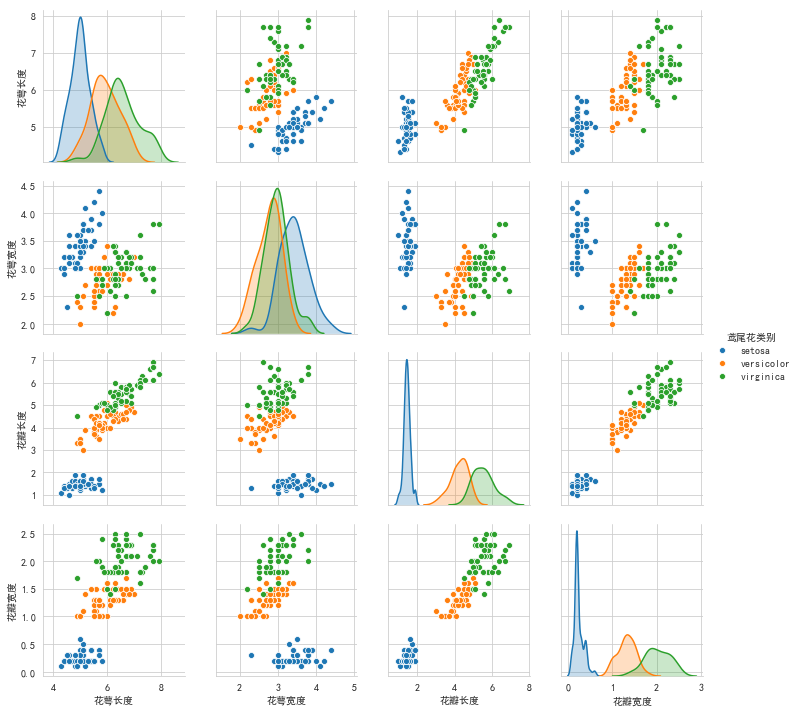

In [7]:
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import seaborn as sns
# 设置显示中文
from matplotlib.font_manager import FontProperties 
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})

iris=load_iris()

df=pd.DataFrame(iris.data,columns=["花萼长度","花萼宽度","花瓣长度","花瓣宽度"])
df["鸢尾花类别"]=iris.target #增加一列，为鸢尾花的类别

df.loc[df["鸢尾花类别"]==0,"鸢尾花类别"]="setosa" #把类别这一列数值为0的替换为setosa
df.loc[df["鸢尾花类别"]==1,"鸢尾花类别"]="versicolor" #把类别这一列数值为1的替换为versicolor
df.loc[df["鸢尾花类别"]==2,"鸢尾花类别"]="virginica" #把类别这一列数值为2的替换为virginica

sns.pairplot(df,hue="鸢尾花类别") # 画Seaborn的散点图矩阵（Pairs Plots）.
"""散点图矩阵建立在两个基本图形上，直方图和散点图。
   对角线上的直方图允许我们看到单个变量的分布，而上下三角形上的散点图显示了两个变量之间的关系。
"""


plt.show()

#### 选用模型/算法

在这一讲，我们选用高斯朴素贝叶斯模型来进行分类。

In [11]:
from sklearn import datasets
iris = datasets.load_iris()

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(iris.data, iris.target)
y_1 = gnb.predict([[4.7,3.2,1.3,0.2]])  

print("预测花萼长度={},花萼宽度={},花瓣长度={},花瓣宽度={}的类别为{}.".format(4.7,3.2,1.3,0.2,y_1))

y_pred = gnb.predict(iris.data)
print("总数 %d ，预测错误数 : %d" % (iris.data.shape[0],(iris.target != y_pred).sum()))


预测花萼长度=4.7,花萼宽度=3.2,花瓣长度=1.3,花瓣宽度=0.2的类别为[0].
总数 150 ，预测错误数 : 6


### 多项式贝叶斯（ Multinomial Naive Bayes）

如果属性值大部分是多元离散值，可以采用多项式模型进行分类预测，这一模型常用于文本分类。

给定训练样本集$D = {(x_1,y_1),(x_2,y_2),...(x_m,y_m)}$。假设标记y有N种可能的类别标记，即$y = \{c_1,c_2,...,c_N\}$。

对于每个分类标记$c$ ，有概率向量P(c)：

$ P(c) = (P(x_1|c),P(x_2|c),...,P(x_m|c))$

其中：

- $x_i$ 表示属性的数量，在文本分类中，就是指文本中不重复单词的数量。

- $P(x_i|y)$是在数据集 D 中属于类型 c 的属性为x_i 的样本的概率 

要求$ P(c)$，可以使用平滑版本的极大似然估计，例如相对频率计数：

$\hat{P}(x_i|y) = \frac{|D_{c,x_i}| + \alpha}{|D_c|+\alpha n}$

平滑因子$\alpha \geq 0$ 的引入是为了考虑在预测时出现训练集中不存在的属性时，预测概率不至于为0.

平滑因子$\alpha = 1$ 就是我们之前提到的拉普拉斯平滑，而$\alpha < 1$ 被称为lidstone平滑。

下面的例子，是使用多项式贝叶斯分类器进行文本分类预测：

20newsgroups数据集是用于文本分类、文本挖据和信息检索研究的国际标准数据集之一。数据集收集了大约20,000左右的新闻组文档，均匀分为20个不同主题的新闻组集合。一些新闻组的主题特别相似(e.g. comp.sys.ibm.pc.hardware/ comp.sys.mac.hardware)，还有一些却完全不相关 (e.g misc.forsale /soc.religion.christian)。

20news-bydate.tar.gz –是按时间顺序分为训练(60%)和测试(40%)两部分数据集，不包含重复文档和新闻组名（新闻组，路径，隶属于，日期）

sklearn.datasets.fetch_20newsgroups，返回一个可以被文本特征提取器

In [1]:
from sklearn.datasets import fetch_20newsgroups  # 从sklearn.datasets里导入新闻数据抓取器 fetch_20newsgroups
from sklearn.model_selection import  train_test_split
from sklearn.feature_extraction.text import CountVectorizer  # 从sklearn.feature_extraction.text里导入文本特征向量化模块
from sklearn.naive_bayes import MultinomialNB     # 从sklean.naive_bayes里导入朴素贝叶斯模型
from sklearn.metrics import classification_report

#1.数据获取
news = fetch_20newsgroups(subset='all')
# 或者为了加速程序执行，我们可以选择几个分类
# categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
# twenty_train = fetch_20newsgroups(subset='train',categories=categories, shuffle=True, random_state=42)
print( len(news.data))  # 输出数据的条数：18846

#2.数据预处理：训练集和测试集分割，文本特征向量化
X_train,X_test,y_train,y_test = train_test_split(news.data,news.target,test_size=0.25,random_state=33) # 随机采样25%的数据样本作为测试集
#print X_train[0]  #查看训练样本
#print y_train[0:100]  #查看标签

#文本特征向量化
vec = CountVectorizer()
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

#3.使用朴素贝叶斯进行训练
mnb = MultinomialNB()   # 使用默认配置初始化朴素贝叶斯
mnb.fit(X_train,y_train)    # 利用训练数据对模型参数进行估计
y_predict = mnb.predict(X_test)     # 对参数进行预测

#4.获取结果报告
print('The Accuracy of Naive Bayes Classifier is:', mnb.score(X_test,y_test))
print(classification_report(y_test, y_predict, target_names = news.target_names))

18846
The Accuracy of Naive Bayes Classifier is: 0.8397707979626485
                          precision    recall  f1-score   support

             alt.atheism       0.86      0.86      0.86       201
           comp.graphics       0.59      0.86      0.70       250
 comp.os.ms-windows.misc       0.89      0.10      0.17       248
comp.sys.ibm.pc.hardware       0.60      0.88      0.72       240
   comp.sys.mac.hardware       0.93      0.78      0.85       242
          comp.windows.x       0.82      0.84      0.83       263
            misc.forsale       0.91      0.70      0.79       257
               rec.autos       0.89      0.89      0.89       238
         rec.motorcycles       0.98      0.92      0.95       276
      rec.sport.baseball       0.98      0.91      0.95       251
        rec.sport.hockey       0.93      0.99      0.96       233
               sci.crypt       0.86      0.98      0.91       238
         sci.electronics       0.85      0.88      0.86       249
       

### 伯努利朴素贝叶斯（ BernoulliNB Naive Bayes）

BernoulliNB 用于数据分布为伯努利分布的问题进行分类预测。

#### 贝努力分布（bernoulli）或0-1分布  

若X的概率分布律为

|X|0|1|
|-|-|-|
|P|1-p|p|

其中$0 < p < 1$，就称X服从参数为p的 0-1分布（或两点分布），记为 $X \sim 0-1(p) $或$X \sim B(1,p)$

其分布律还可以写为：$P(X=K) = p^k(1-p)^{1-k}, k = 0, 1$

若P(X=c) = 1，则X服从退化分布。

**0-1分布的应用**

若一个随机试验，它的样本空间只包含两个元素，即$S = {e_1,e_2}$，我们总能在S上定义一个服从（0-1）分布的随机变量：

X = 0，当 e = e_1
X = 1, 当 e = e_2
来描述这个随机试验的结果。

如果输入数据不是0-1数值，而是其它类型的数据，BernoulliNB实例可以利用binarize参数，将其输入二值化。

伯努利朴素贝叶斯的决策规则是基于

$P(x_i|c) = P(x_i|c)x_i + (1-P(x_i|c))(1-x_i)$

这与多项式贝叶斯分类器不同，在预测时，遇到没见过的属性值，多项式贝叶斯简单地忽略了不存在的属性值；而伯努利贝叶斯则它明确地处罚了不存在于训练集中的属性值。

在文本分类的情况下，可以使用单词出现向量（而不是单词计数向量）来训练和使用该分类器。BernoulliNB 可能在某些数据集上表现更好，特别是那些文档较短的数据集。如果时间允许，建议评估两种模型。